In [1]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Více grafů v jednom obrázku

## Přesné umístění

Na vytvoření více grafů v jednom obrázku není nic magického. Prostě jen zavoláme několikrát metodu `add_axes` objektu `Figure`.

Text(0.5, 1.0, 'detail')

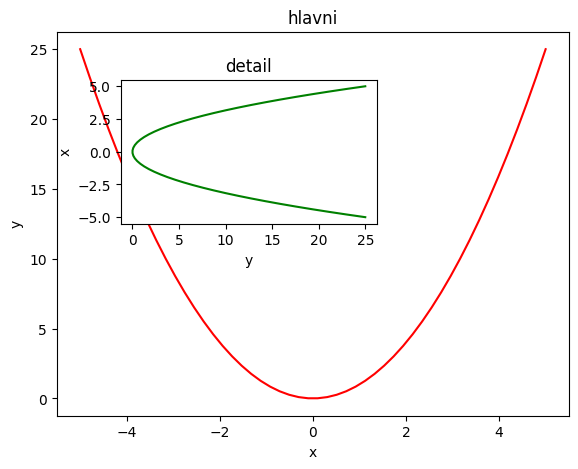

In [3]:
# Vytvoříme jednoduchá data
# (50 bodů rovnoměrně rozmístěných na úseku -1,5)
x = np.linspace(-5, 5, 50)
# jejich druhá mocnina (tj. parabola)
y = x ** 2

fig = plt.figure()

axes1 = fig.add_axes((0.1, 0.1, 0.8, 0.8)) # Hlavní
axes2 = fig.add_axes((0.2, 0.5, 0.4, 0.3)) # Menší, vlevo nahoře

# Hlavní graf
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('hlavni')

# Vnořený graf
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('detail')

### Rozložení navržené matplotlibem

Matplotlib nabízí různé "správce rozložení", které se starají o rozložení více grafů do jednoho obrázku. Nejjednodušší z nich je `subplots`.

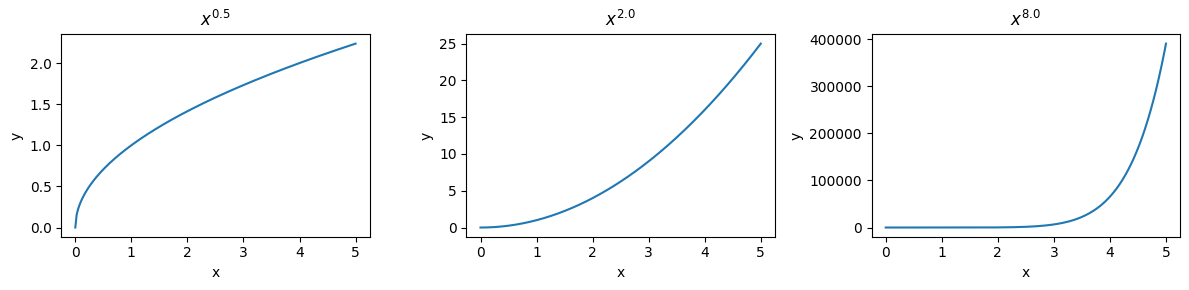

In [5]:
# Vytvoříme 1x3 podgrafy v širokém grafu.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

# pokud máme k dispozici LaTeX, můžeme jej použít pro hezčí vysázení titulku grafu
# plt.rcParams['text.usetex'] = True

for i, ax in enumerate(axes):
    # V numpy vytvoříme pravidelně rozmístěné hodnoty osy x
    x = np.linspace(0, 5, 200)
    
    # Umocníme na 
    power = (2. ** (2*i - 1))
    
    # Vypočítáme hodnoty y
    y = x ** power
    
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Použijeme LaTeXovou syntax pro správné vysázení titulku grafu.
    ax.set_title(f"$x^{{{power}}}$")
    
# Opravíme rozložení, aby nám grafy nelezly přes sebe.
fig.tight_layout()

### Komplikovanější rozložení

Pro vytvoření ještě komplikovanějších rozložení slouží metody `gridspec` a `subplot2grid`, viz http://matplotlib.org/users/gridspec.html.

In [ ]:
# Inspirující (a zároveň odstrašující) ukázka
fig = plt.figure()

# shape=(3,3) - 3 řádky, 3 sloupce
# loc=(0,0) - začínáme v levém horním rohu
# colspan=3 - zabíráme 3 sloupce
# rowspan=2 - zabíráme 2 řádky
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

# Dvě různé osy v jednom grafu

Pokud chceme v jednom grafu mít pro dvě různé datové sady dvě různé osy *x* nebo dvě různé osy *y*, můžeme použít metody `twinx` a `twiny` třídy `Axes`, které vytvoří novou soustavu souřadnic se sdílenou osou *x*, potažmo *y*.

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, linewidth=2, color="blue")
ax1.set_ylabel("area $(m^2)$", fontsize=15, color="blue")
    
ax2 = ax1.twinx() # Kopie soustavy souřadnic, sdílející osu x
ax2.plot(x, x**3, linewidth=2, color="red")
ax2.set_ylabel("volume $(m^3)$", fontsize=15, color="red")

In [ ]:
# example of a twiny plot
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, linewidth=2, color="blue")
ax1.set_xlabel("quadratic", fontsize=15, color="blue")
    
ax2 = ax1.twiny() # Kopie soustavy souřadnic, sdílející osu y
ax2.plot(x*5, x*5, linewidth=2, color="red")
ax2.set_xlabel("linear", fontsize=15, color="red")

